In [1]:
import numpy as np
import pandas as pd
import sklearn 
import os

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame= False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [9]:
X, y= mnist['data'], mnist['target']
y.shape

(70000,)

In [21]:
y = y.astype(np.uint8)

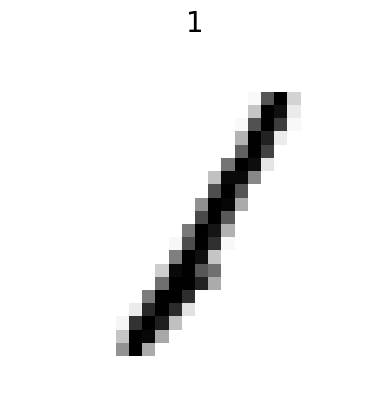

In [22]:
import matplotlib as mpl
import matplotlib.pyplot as plt
n = np.random.randint(1,70000)
random_digit = X[n]
random_digit_image = random_digit.reshape(28,28)
plt.imshow(random_digit_image, cmap=mpl.cm.binary)
plt.axis('off')
plt.title(y[n], fontsize=20)
plt.show()

In [23]:
x_train, x_test, y_train, y_test= X[:60000], X[60000:], y[:60000], y[60000:]

In [27]:
from sklearn.svm import SVC
svm_classifier = SVC(gamma= 'auto', kernel= 'rbf')
svm_classifier.fit(x_train[:10000], y_train[:10000])
svm_classifier.predict(x_train[15000:20000])

array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

In [31]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled= scaler.fit_transform(x_train)

In [30]:
cross_val_score(svm_classifier, x_train_scaled[:10000], y_train[:10000], scoring='accuracy')

array([0.9245, 0.9455, 0.9335, 0.9335, 0.921 ])

In [ ]:
from sklearn.metrics import confusion_matrix
prediction = cross_val_predict(svm_classifier, x_train_scaled, y_train, cv=3)


In [ ]:
confusion_matrixx =  confusion_matrix(y_train[:10000], prediction)
confusion_matrixx

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
cax = ax.matshow(confusion_matrixx)
fig.colorbar(cax)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_train_multilabel = np.c_(y_train_large, y_train_odd)
y_test_large = (y_test >= 7)
y_test_odd = (y_test % 2 == 1)
y_test_multilabel = np.c_(y_test_large, y_test_odd)

knc = KNeighborsClassifier(algorithm='kd_tree',weights='distance', n_neighbors=4)
knc.fit(x_train, y_train_multilabel)
knc_prediction = knc.predict(x_test)
accuracy_score(y_test_multilabel, knc_prediction)